## Table of Contents

1. Load Libraries and Data
2. Data Preparation
3. Dendrogram Creation with 2000s Data
4. PCA Dimension Reduction
5. Hierarchical Clustering with PCA Reduced Data

## 1. Load Libraries and Data

In [3]:
## Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [4]:
## Import Data

df_scaled = pd.read_csv('/Users/samabrams/Data Analysis Projects/ClimateWins-ML-Project/02 Data/Prepared Data/weather_scaled.csv')
df_pleasant = pd.read_csv('/Users/samabrams/Data Analysis Projects/ClimateWins-ML-Project/02 Data/Original Data/Answers-Weather_Prediction_Pleasant_Weather.csv')

In [5]:
df_scaled

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,20221027,10,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,22946,20221028,10,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,22947,20221029,10,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,22948,20221030,10,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


## 2. Data Preparation

In [7]:
df_scaled.drop('MONTH', axis=1, inplace=True)
df_scaled

,Unnamed: 0,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,20221027,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,22946,20221028,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,22947,20221029,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,22948,20221030,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [8]:
df_pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_scaled.columns.tolist()

['Unnamed: 0',
 'DATE',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressur

In [10]:
df_2000s = df_scaled[df_scaled['DATE'] >= 20000101].drop('DATE', axis=1)
df_2000s

,Unnamed: 0,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14610,14610,1.076130,-0.02793,1.187444,1.618161,-1.229941,-0.385392,-0.179228,-1.065304,-1.017527,...,0.169692,0.902363,0.863006,-1.077399,-0.372456,-0.024706,-0.829285,-1.239016,-1.585517,-0.723479
14611,14611,1.076130,-0.02793,1.006770,2.107251,-1.176243,-0.445514,-0.179228,-1.065304,-0.922462,...,1.396477,1.324188,0.322318,-1.183432,0.006276,-0.024706,-1.039536,-0.337751,-0.164486,-0.838511
14612,14612,-0.170720,-0.02793,0.464749,2.046115,-0.907754,-0.445514,-0.179228,-0.206978,-1.112591,...,-1.057093,-0.503721,0.107908,-1.077399,0.751904,-0.024706,-0.679106,-0.638173,-0.164486,-1.039817
14613,14613,0.660514,-0.02793,0.284075,1.251344,-0.768140,0.255911,-0.179228,0.535359,-0.881720,...,0.169692,-0.925546,-0.404813,-0.912459,-0.088407,-0.024706,0.011717,-0.788384,-0.793019,-1.672492
14614,14614,-0.170720,-0.02793,1.277781,1.006799,-0.897015,-0.305229,-0.179228,-0.206978,-0.596526,...,0.783085,-0.222504,-1.728565,-1.195214,-0.100243,-0.024706,-1.039536,-0.908552,-1.066294,-0.637205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,0.747959,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,22946,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,0.856604,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,22947,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,0.856604,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,22948,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,0.680055,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


## 3. Dendrograms with 2000s Weather Data

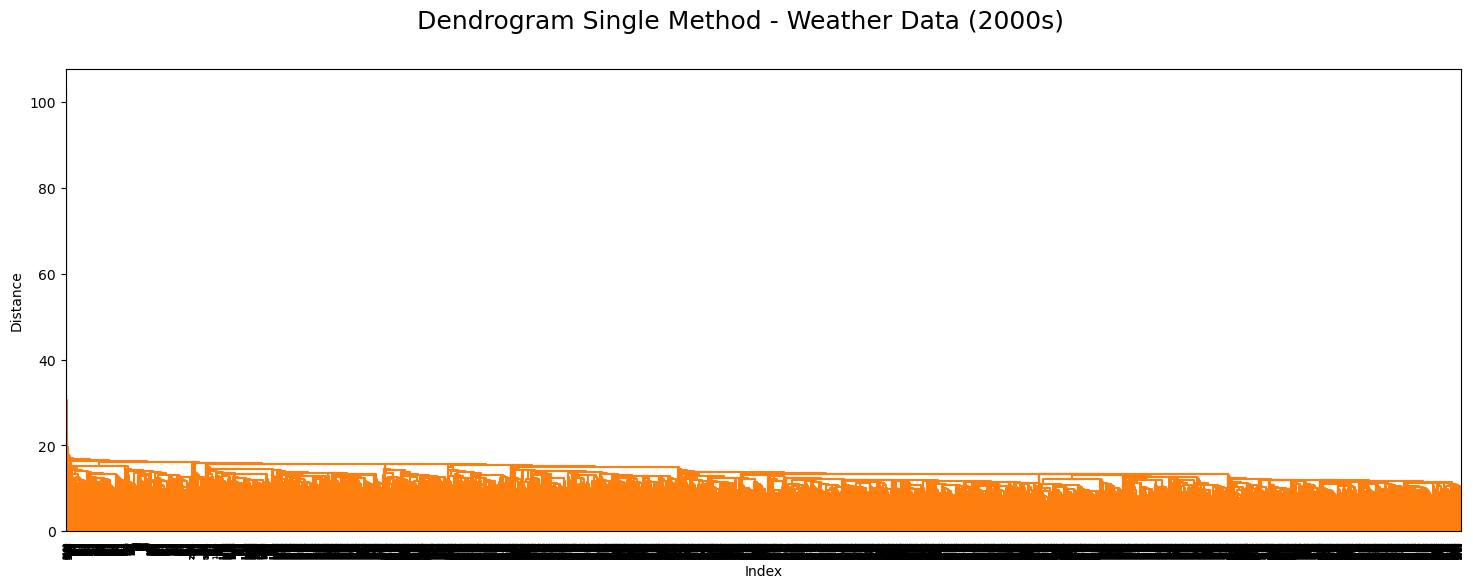

In [12]:
## Single Method

dist_single = linkage(df_2000s, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method - Weather Data (2000s)", fontsize=18)
plt.show()

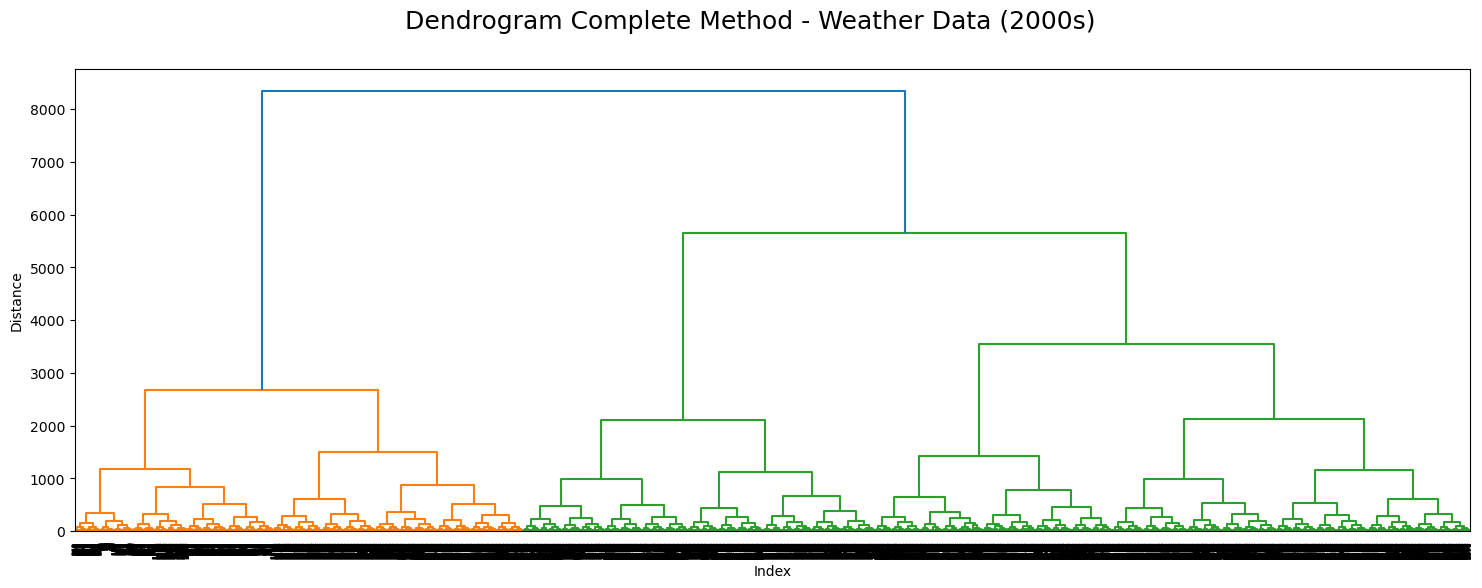

In [13]:
## Complete Method

dist_complete = linkage(df_2000s, method="complete")
plt.figure(figsize=(18,6))
dendrogram(dist_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method - Weather Data (2000s)", fontsize=18)
plt.show()

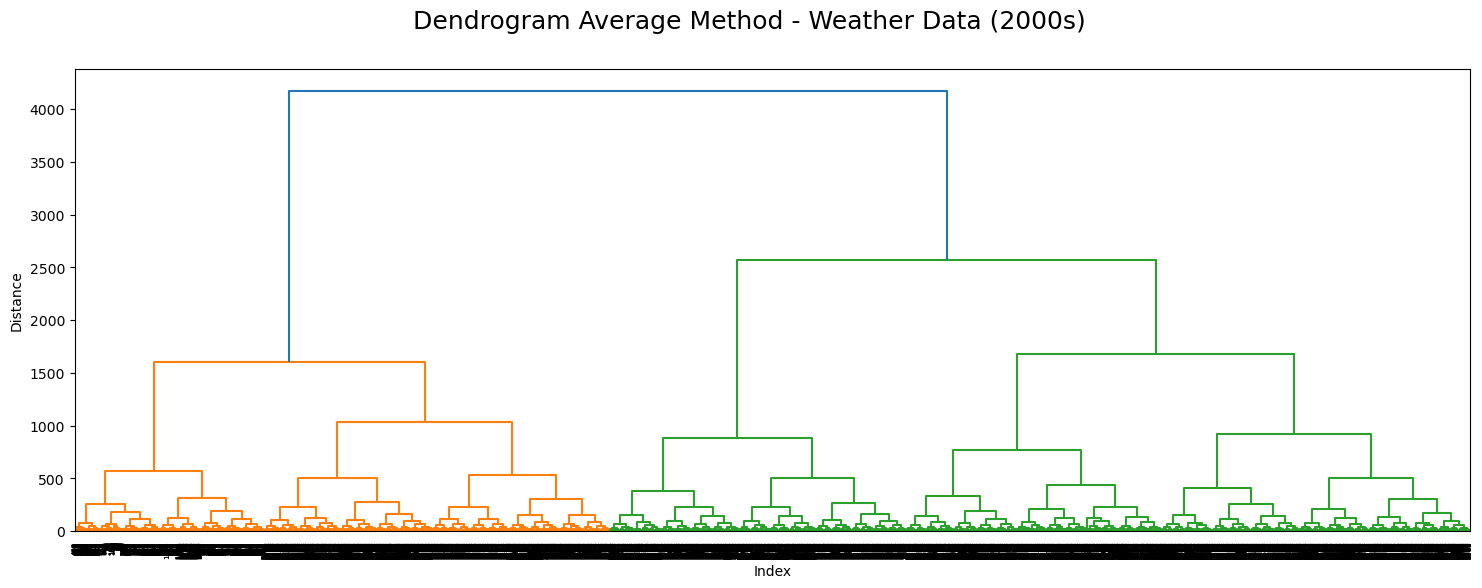

In [14]:
## Average Method

dist_average = linkage(df_2000s, method="average")
plt.figure(figsize=(18,6))
dendrogram(dist_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method - Weather Data (2000s)", fontsize=18)
plt.show()

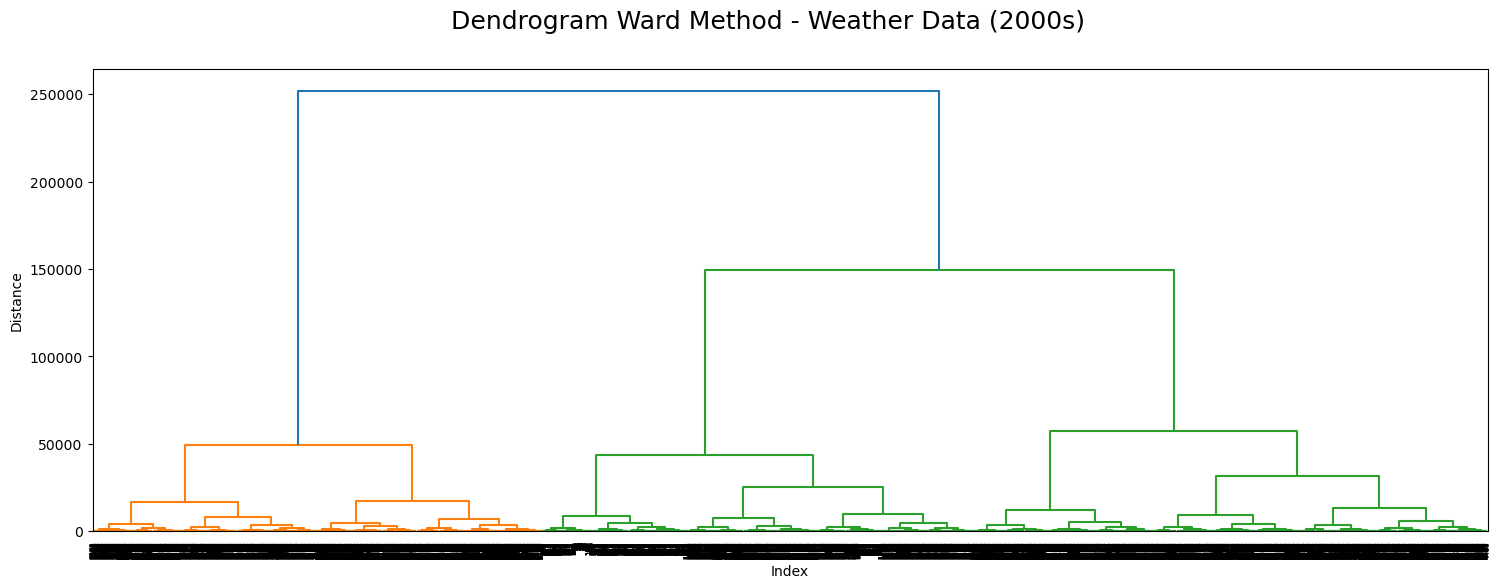

In [15]:
## Ward Method

dist_ward = linkage(df_2000s, method="ward")
plt.figure(figsize=(18,6))
dendrogram(dist_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method - Weather Data (2000s)", fontsize=18)
plt.show()

In [16]:
# Create a copy of your 2000s scaled data
df_weather_clusters = df_2000s.copy()

# Add cluster assignments for 2 and 3 clusters for each method
df_weather_clusters['single_clust2'] = fcluster(dist_single, 2, criterion='maxclust')
df_weather_clusters['single_clust3'] = fcluster(dist_single, 3, criterion='maxclust')

df_weather_clusters['complete_clust2'] = fcluster(dist_complete, 2, criterion='maxclust')
df_weather_clusters['complete_clust3'] = fcluster(dist_complete, 3, criterion='maxclust')

df_weather_clusters['average_clust2'] = fcluster(dist_average, 2, criterion='maxclust')
df_weather_clusters['average_clust3'] = fcluster(dist_average, 3, criterion='maxclust')

df_weather_clusters['ward_clust2'] = fcluster(dist_ward, 2, criterion='maxclust')
df_weather_clusters['ward_clust3'] = fcluster(dist_ward, 3, criterion='maxclust')

In [17]:
print("Cluster counts for each method:")
print("\n2 Clusters:")
print(f"Single: {df_weather_clusters['single_clust2'].value_counts().sort_index()}")
print(f"Complete: {df_weather_clusters['complete_clust2'].value_counts().sort_index()}")
print(f"Average: {df_weather_clusters['average_clust2'].value_counts().sort_index()}")
print(f"Ward: {df_weather_clusters['ward_clust2'].value_counts().sort_index()}")

print("\n3 Clusters:")
print(f"Single: {df_weather_clusters['single_clust3'].value_counts().sort_index()}")
print(f"Complete: {df_weather_clusters['complete_clust3'].value_counts().sort_index()}")
print(f"Average: {df_weather_clusters['average_clust3'].value_counts().sort_index()}")
print(f"Ward: {df_weather_clusters['ward_clust3'].value_counts().sort_index()}")

Cluster counts for each method:

2 Clusters:
Single: single_clust2
1    8339
2       1
Name: count, dtype: int64
Complete: complete_clust2
1    2683
2    5657
Name: count, dtype: int64
Average: average_clust2
1    3201
2    5139
Name: count, dtype: int64
Ward: ward_clust2
1    2687
2    5653
Name: count, dtype: int64

3 Clusters:
Single: single_clust3
1    8338
2       1
3       1
Name: count, dtype: int64
Complete: complete_clust3
1    2683
2    2104
3    3553
Name: count, dtype: int64
Average: average_clust3
1    3201
2    1771
3    3368
Name: count, dtype: int64
Ward: ward_clust3
1    2687
2    2578
3    3075
Name: count, dtype: int64


In [18]:
# Create a summary dataframe for easier comparison
cluster_summary = pd.DataFrame()

for method in ['single', 'complete', 'average', 'ward']:
    for n_clust in [2, 3]:
        counts = df_weather_clusters[f'{method}_clust{n_clust}'].value_counts().sort_index()
        for cluster_num, count in counts.items():
            cluster_summary = pd.concat([cluster_summary, pd.DataFrame({
                'Method': [method],
                'Clusters': [n_clust],
                'Cluster_Number': [cluster_num],
                'Count': [count]
            })], ignore_index=True)

print(cluster_summary)

      Method  Clusters  Cluster_Number  Count
0     single         2               1   8339
1     single         2               2      1
2     single         3               1   8338
3     single         3               2      1
4     single         3               3      1
5   complete         2               1   2683
6   complete         2               2   5657
7   complete         3               1   2683
8   complete         3               2   2104
9   complete         3               3   3553
10   average         2               1   3201
11   average         2               2   5139
12   average         3               1   3201
13   average         3               2   1771
14   average         3               3   3368
15      ward         2               1   2687
16      ward         2               2   5653
17      ward         3               1   2687
18      ward         3               2   2578
19      ward         3               3   3075


## 4. PCA Dimension Reduction

In [20]:
# Run the PCA model, reducing to 2 components (like the iris example)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_2000s)

# Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2'])

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))

Explained variance ratio: [9.99971571e-01 9.62957508e-06]
Total variance explained: 0.9999812004277403


In [21]:
# Add the dates to show the relationship
dates_2000s = df_scaled[df_scaled['DATE'] >= 20000101]['DATE']
dfPCA['DATE'] = dates_2000s.values

# Convert to datetime for better plotting
dfPCA['datetime'] = pd.to_datetime(dfPCA['DATE'], format='%Y%m%d')
dfPCA['month'] = dfPCA['datetime'].dt.month
dfPCA['season'] = dfPCA['month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                      3: 'Spring', 4: 'Spring', 5: 'Spring',
                                      6: 'Summer', 7: 'Summer', 8: 'Summer',
                                      9: 'Fall', 10: 'Fall', 11: 'Fall'})

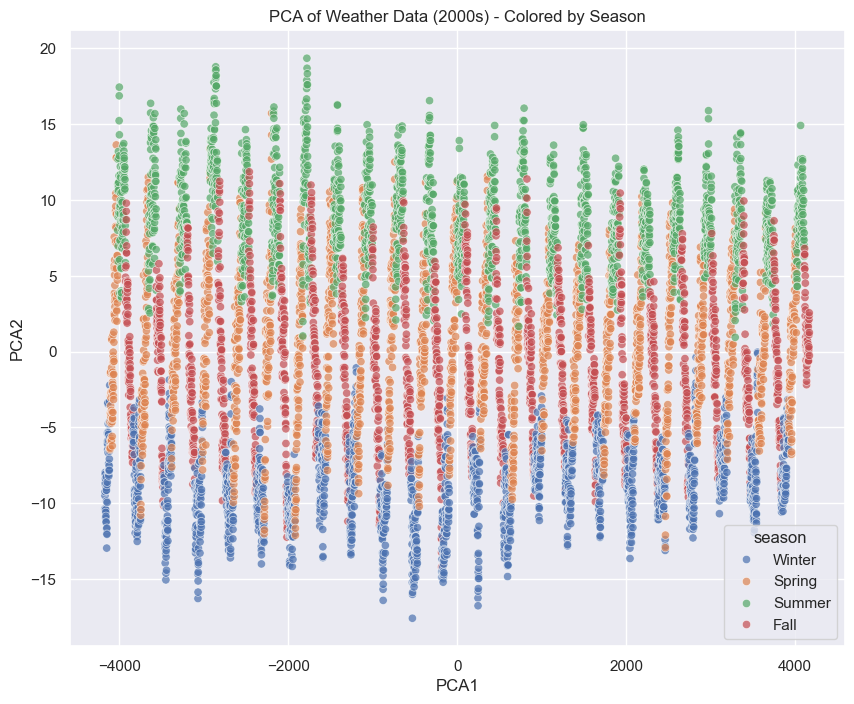

In [22]:
sns.set_theme()
plt.figure(figsize=(10, 8))
g = sns.scatterplot(x="PCA1", y="PCA2", hue="season", data=dfPCA, alpha=0.7)
plt.title('PCA of Weather Data (2000s) - Colored by Season')
plt.show()

In [23]:
# Export the reduced data set to a new CSV file
dfPCA_export = dfPCA[['DATE', 'PCA1', 'PCA2']].copy()
dfPCA_export.to_csv('weather_data_pca_reduced.csv', index=False)

## 5. Hierarchical Clustering with PCA Reduced Data

In [25]:
## Use only the PCA components for clustering

pca_features = dfPCA[['PCA1', 'PCA2']]

## Create linkage for all four methods

dist_single_pca = linkage(pca_features, method="single")
dist_complete_pca = linkage(pca_features, method="complete")
dist_average_pca = linkage(pca_features, method="average")
dist_ward_pca = linkage(pca_features, method="ward")

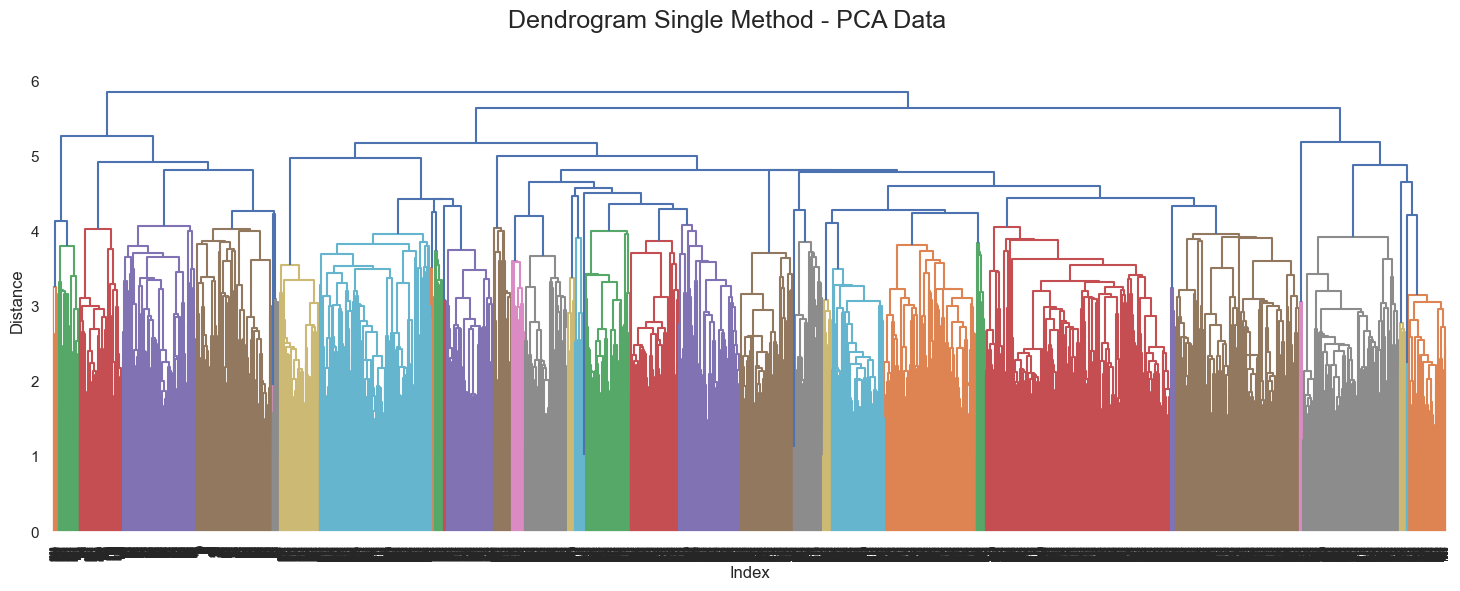

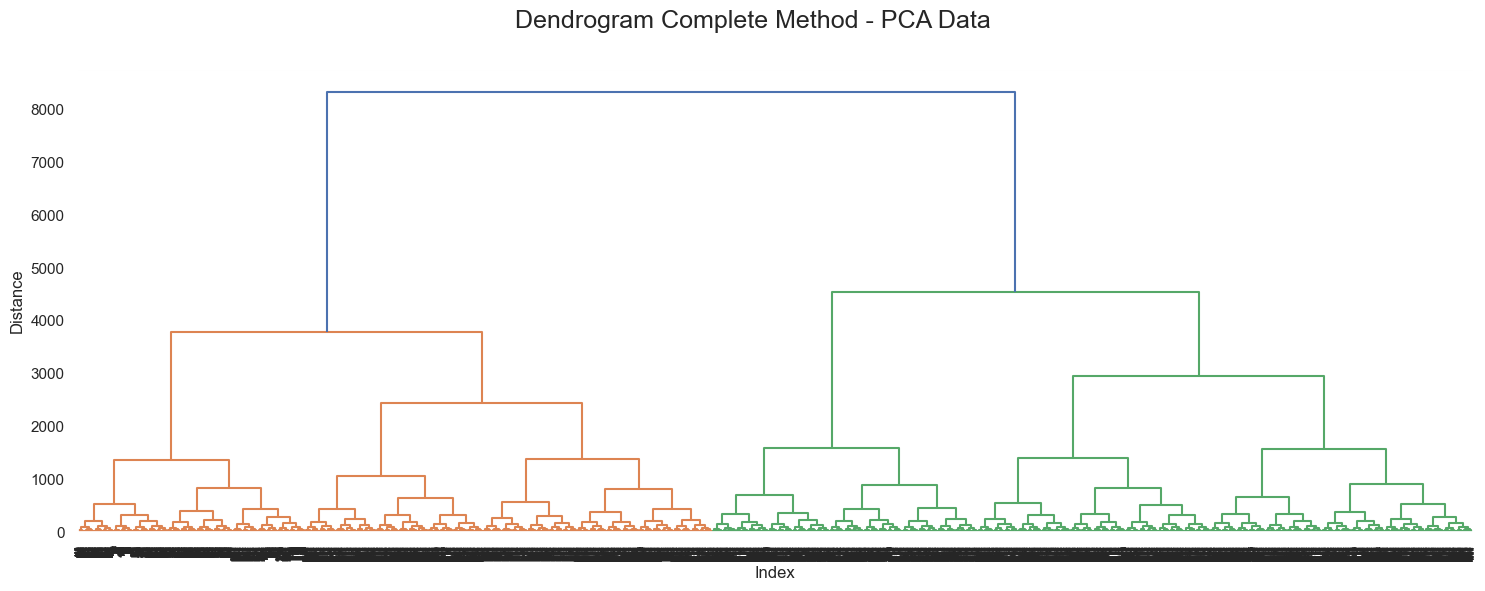

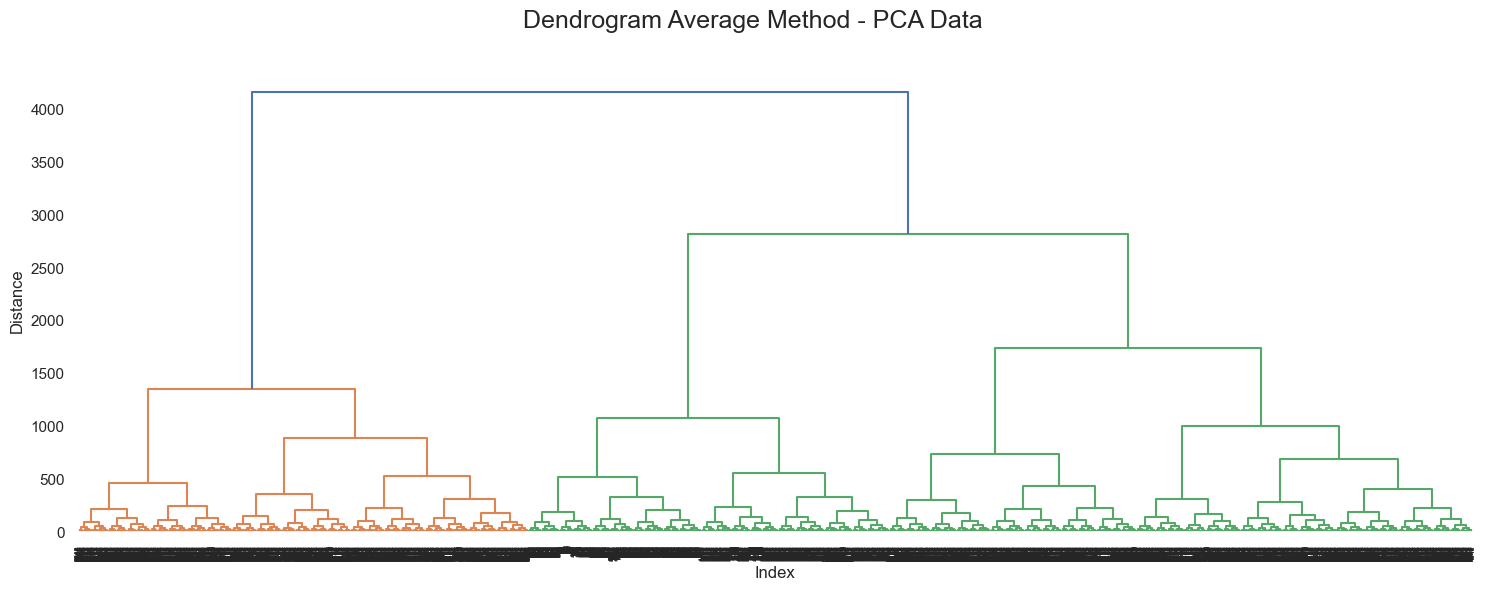

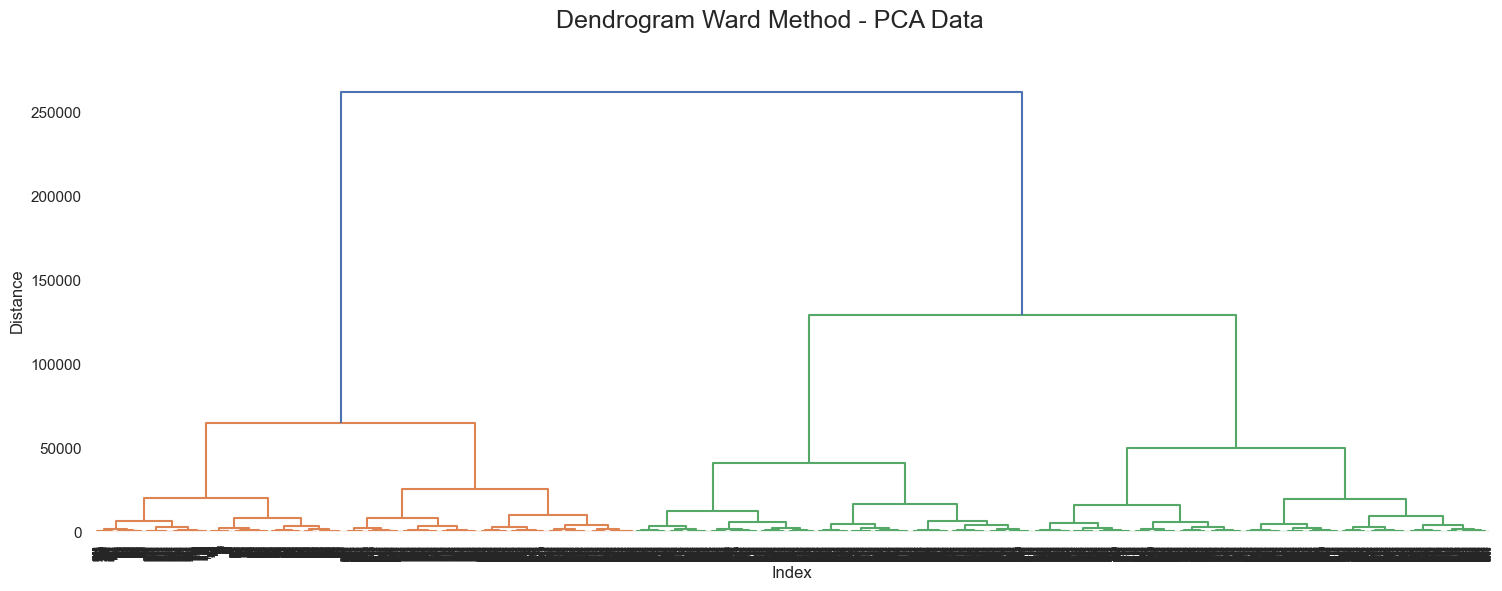

In [26]:
# Single method
plt.figure(figsize=(18,6))
dendrogram(dist_single_pca, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method - PCA Data", fontsize=18)
plt.show()

# Complete method
plt.figure(figsize=(18,6))
dendrogram(dist_complete_pca, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method - PCA Data", fontsize=18)
plt.show()

# Average method
plt.figure(figsize=(18,6))
dendrogram(dist_average_pca, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method - PCA Data", fontsize=18)
plt.show()

# Ward method
plt.figure(figsize=(18,6))
dendrogram(dist_ward_pca, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method - PCA Data", fontsize=18)
plt.show()

In [27]:
# Create cluster assignments for PCA data
df_pca_clusters = pca_features.copy()

df_pca_clusters['single_clust2'] = fcluster(dist_single_pca, 2, criterion='maxclust')
df_pca_clusters['single_clust3'] = fcluster(dist_single_pca, 3, criterion='maxclust')

df_pca_clusters['complete_clust2'] = fcluster(dist_complete_pca, 2, criterion='maxclust')
df_pca_clusters['complete_clust3'] = fcluster(dist_complete_pca, 3, criterion='maxclust')

df_pca_clusters['average_clust2'] = fcluster(dist_average_pca, 2, criterion='maxclust')
df_pca_clusters['average_clust3'] = fcluster(dist_average_pca, 3, criterion='maxclust')

df_pca_clusters['ward_clust2'] = fcluster(dist_ward_pca, 2, criterion='maxclust')
df_pca_clusters['ward_clust3'] = fcluster(dist_ward_pca, 3, criterion='maxclust')

# Show cluster counts
print("PCA Cluster counts:")
print("\n2 Clusters:")
print(f"Single: {df_pca_clusters['single_clust2'].value_counts().sort_index()}")
print(f"Complete: {df_pca_clusters['complete_clust2'].value_counts().sort_index()}")
print(f"Average: {df_pca_clusters['average_clust2'].value_counts().sort_index()}")
print(f"Ward: {df_pca_clusters['ward_clust2'].value_counts().sort_index()}")

print("\n3 Clusters:")
print(f"Single: {df_pca_clusters['single_clust3'].value_counts().sort_index()}")
print(f"Complete: {df_pca_clusters['complete_clust3'].value_counts().sort_index()}")
print(f"Average: {df_pca_clusters['average_clust3'].value_counts().sort_index()}")
print(f"Ward: {df_pca_clusters['ward_clust3'].value_counts().sort_index()}")

PCA Cluster counts:

2 Clusters:
Single: single_clust2
1    1361
2    6979
Name: count, dtype: int64
Complete: complete_clust2
1    3794
2    4546
Name: count, dtype: int64
Average: average_clust2
1    2697
2    5643
Name: count, dtype: int64
Ward: ward_clust2
1    3228
2    5112
Name: count, dtype: int64

3 Clusters:
Single: single_clust3
1    1361
2    6099
3     880
Name: count, dtype: int64
Complete: complete_clust3
1    3794
2    1586
3    2960
Name: count, dtype: int64
Average: average_clust3
1    2697
2    2154
3    3489
Name: count, dtype: int64
Ward: ward_clust3
1    3228
2    2384
3    2728
Name: count, dtype: int64


In [28]:
# Create a summary dataframe for PCA clustering results
pca_cluster_summary = pd.DataFrame()

for method in ['single', 'complete', 'average', 'ward']:
    for n_clust in [2, 3]:
        counts = df_pca_clusters[f'{method}_clust{n_clust}'].value_counts().sort_index()
        for cluster_num, count in counts.items():
            pca_cluster_summary = pd.concat([pca_cluster_summary, pd.DataFrame({
                'Method': [method],
                'Clusters': [n_clust],
                'Cluster_Number': [cluster_num],
                'Count': [count]
            })], ignore_index=True)

print(pca_cluster_summary)

      Method  Clusters  Cluster_Number  Count
0     single         2               1   1361
1     single         2               2   6979
2     single         3               1   1361
3     single         3               2   6099
4     single         3               3    880
5   complete         2               1   3794
6   complete         2               2   4546
7   complete         3               1   3794
8   complete         3               2   1586
9   complete         3               3   2960
10   average         2               1   2697
11   average         2               2   5643
12   average         3               1   2697
13   average         3               2   2154
14   average         3               3   3489
15      ward         2               1   3228
16      ward         2               2   5112
17      ward         3               1   3228
18      ward         3               2   2384
19      ward         3               3   2728
